In [3]:
from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt
import cv2
import imutils

In [4]:
cap = cv2.VideoCapture('../samples/testing/videos/smallslow.mp4')

In [5]:
type(cap)

cv2.VideoCapture

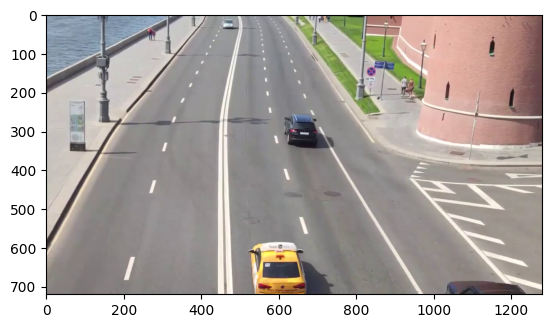

In [108]:
cap = cv2.VideoCapture('../samples/testing/videos/smallslow.mp4')
frame_no = 0
frame1 = None
frame2 = None
while frame_no < 250:
    ret, frame = cap.read()
    if frame_no == 150:
        frame2 = frame
        break
    if frame_no == 145:
        frame1 = frame
    frame_no += 1
cap.release()
    
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGBA))
# cv2.imwrite('../samples/misc/temp.png', frame)

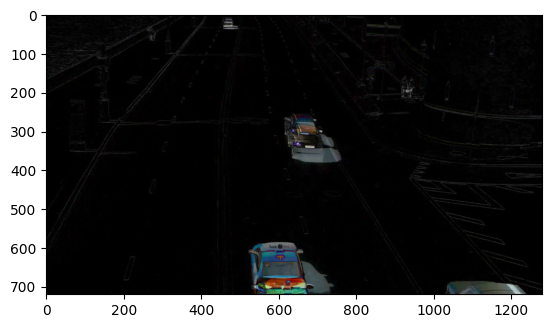

In [116]:
frame = cv2.absdiff(frame1, frame2)
plt.imshow(frame)

In [114]:
#Step 1
gray= cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
#STEP2
edged= cv2.Canny(gray, 30, 150)

#Step3: Thresholding
thresh= cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY)[1]
# thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 2)

#STEP4
cnts= cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts= imutils.grab_contours(cnts)
print(len(cnts))

988


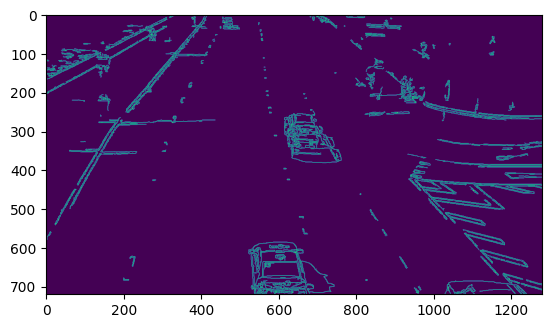

In [115]:
plt.imshow(edged)

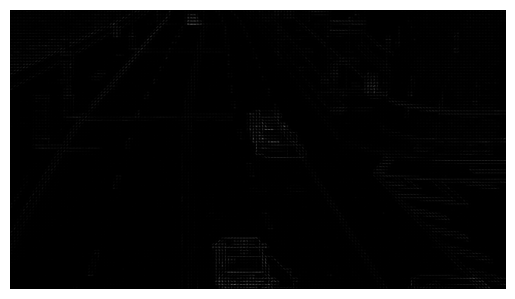

In [113]:
fd, hog_image = hog(gray, orientations=9, pixels_per_cell=(8, 8),
                	cells_per_block=(2, 2), visualize=True)
plt.axis("off")
plt.imshow(hog_image, cmap="gray")
plt.show()